<a href="https://colab.research.google.com/github/Pakryeongmi/python_bigdata/blob/main/%EB%B9%84%ED%8A%B82205_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EB%94%A5%EB%9F%AC%EB%8B%9D_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##LSTM

In [1]:
import pandas as pd

In [5]:
path = '/content/drive/MyDrive/data/000080.csv'
df = pd.read_csv(path)
data = df['Open']
len(data)

250

In [6]:
len_input = 4 #시계열 데이터에서 특성 수 4개로 결정
train_input = []
train_target = []
for i in range(len_input, 250):
  train_input.append(data[i-len_input:i]) #최초 i 값은 4[0,1,2,3], [1,2,3,4]....[245,246,247,248]
  train_target.append(data[i]) #i값이 4로 시작[4,5,6...249]
print(len(train_input), len(train_target))

246 246


In [7]:
import numpy as np

In [10]:
train_input2 = np.array(train_input)
train_target2 = np.array(train_target)
print(train_input2.shape, train_target2.shape)

(246, 4) (246,)


In [12]:
train_input3 = train_input2.reshape(-1, len_input, 1)
print(train_input3.shape)

(246, 4, 1)


In [13]:
from tensorflow import keras

In [14]:
model = keras.Sequential()
model.add(keras.layers.LSTM(16, input_shape=(len_input, 1), activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(loss = keras.losses.mean_squared_error)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16)                1152      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(train_input3, train_target2, epochs=1000)

Epoch 1/1000
8/8 [==============================] - 0s 5ms/step - loss: 1042549.1875
Epoch 2/1000
8/8 [==============================] - 0s 6ms/step - loss: 1058859.0000
Epoch 3/1000
8/8 [==============================] - 0s 5ms/step - loss: 1057837.3750
Epoch 4/1000
8/8 [==============================] - 0s 6ms/step - loss: 1058447.5000
Epoch 5/1000
8/8 [==============================] - 0s 5ms/step - loss: 1046357.5625
Epoch 6/1000
8/8 [==============================] - 0s 5ms/step - loss: 1081448.6250
Epoch 7/1000
8/8 [==============================] - 0s 5ms/step - loss: 1044750.5625
Epoch 8/1000
8/8 [==============================] - 0s 5ms/step - loss: 1054430.6250
Epoch 9/1000
8/8 [==============================] - 0s 5ms/step - loss: 1045542.3125
Epoch 10/1000
8/8 [==============================] - 0s 5ms/step - loss: 1052539.0000
Epoch 11/1000
8/8 [==============================] - 0s 5ms/step - loss: 1040111.4375
Epoch 12/1000
8/8 [==============================] - 0s 4ms/ste

In [17]:
re = model.predict(train_input3)

In [18]:
import matplotlib.pyplot as plt

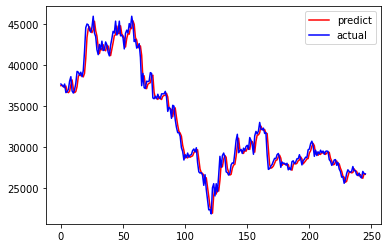

In [19]:
plt.plot(re, 'r', label='predict')
plt.plot(train_target2, 'b', label='actual')
plt.legend()
plt.show()

In [20]:
path2 = '/content/drive/MyDrive/data/iap.csv'
df2 = pd.read_csv(path2, header=None)
data = df2[1]

In [21]:
len_input = 12 
train_input = []
train_target = []
for i in range(len_input, 144):
  train_input.append(data[i-len_input:i]) 
  train_target.append(data[i])
print(len(train_input), len(train_target))

132 132


In [22]:
train_input2 = np.array(train_input)
train_target2 = np.array(train_target)
print(train_input2.shape, train_target2.shape)

(132, 12) (132,)


In [23]:
train_input3 = train_input2.reshape(-1, len_input, 1)
print(train_input3.shape)

(132, 12, 1)


In [24]:
model = keras.Sequential()
model.add(keras.layers.LSTM(16, input_shape=(len_input, 1), activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(loss = keras.losses.mean_squared_error)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 16)                1152      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(train_input3, train_target2, epochs=1000)

Epoch 1/1000
5/5 [==============================] - 1s 6ms/step - loss: 9385.3154
Epoch 2/1000
5/5 [==============================] - 0s 5ms/step - loss: 4124.5757
Epoch 3/1000
5/5 [==============================] - 0s 7ms/step - loss: 2676.8738
Epoch 4/1000
5/5 [==============================] - 0s 6ms/step - loss: 2043.5507
Epoch 5/1000
5/5 [==============================] - 0s 6ms/step - loss: 1796.0026
Epoch 6/1000
5/5 [==============================] - 0s 7ms/step - loss: 1285.5236
Epoch 7/1000
5/5 [==============================] - 0s 6ms/step - loss: 1071.3759
Epoch 8/1000
5/5 [==============================] - 0s 6ms/step - loss: 1089.5337
Epoch 9/1000
5/5 [==============================] - 0s 6ms/step - loss: 1817.6913
Epoch 10/1000
5/5 [==============================] - 0s 6ms/step - loss: 1366.8131
Epoch 11/1000
5/5 [==============================] - 0s 5ms/step - loss: 1245.2427
Epoch 12/1000
5/5 [==============================] - 0s 6ms/step - loss: 936.4795
Epoch 13/1000


In [26]:
re = model.predict(train_input3)

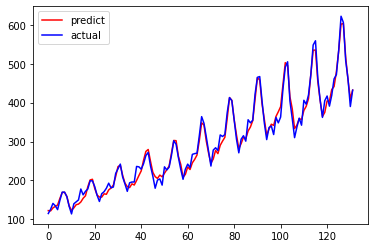

In [27]:
plt.plot(re, 'r', label='predict')
plt.plot(train_target2, 'b', label='actual')
plt.legend()
plt.show()

In [28]:
print(np.mean(data))

280.2986111111111


In [29]:
data[120]

360

In [30]:
data[121]

342

In [31]:
print(np.mean(data[108:120]))

381.0


In [32]:
data[120:132]

120    360
121    342
122    406
123    396
124    420
125    472
126    548
127    559
128    463
129    407
130    362
131    405
Name: 1, dtype: int64

In [33]:
model = keras.Sequential()
model.add(keras.layers.LSTM(16, input_shape=(len_input, 1), activation='relu', return_sequences=True))
model.add(keras.layers.LSTM(8, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(loss = keras.losses.mean_squared_error)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 12, 16)            1152      
                                                                 
 lstm_3 (LSTM)               (None, 8)                 800       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________


In [34]:
history = model.fit(train_input3, train_target2, epochs=1000)

Epoch 1/1000
5/5 [==============================] - 4s 10ms/step - loss: 68967.6016
Epoch 2/1000
5/5 [==============================] - 0s 10ms/step - loss: 58516.4023
Epoch 3/1000
5/5 [==============================] - 0s 10ms/step - loss: 50750.0156
Epoch 4/1000
5/5 [==============================] - 0s 9ms/step - loss: 41063.4102
Epoch 5/1000
5/5 [==============================] - 0s 10ms/step - loss: 32945.9258
Epoch 6/1000
5/5 [==============================] - 0s 10ms/step - loss: 25277.3262
Epoch 7/1000
5/5 [==============================] - 0s 10ms/step - loss: 17675.2949
Epoch 8/1000
5/5 [==============================] - 0s 10ms/step - loss: 9849.8262
Epoch 9/1000
5/5 [==============================] - 0s 11ms/step - loss: 3198.2339
Epoch 10/1000
5/5 [==============================] - 0s 9ms/step - loss: 2257.9067
Epoch 11/1000
5/5 [==============================] - 0s 10ms/step - loss: 2027.1210
Epoch 12/1000
5/5 [==============================] - 0s 9ms/step - loss: 1364.53

In [35]:
re = model.predict(train_input3)

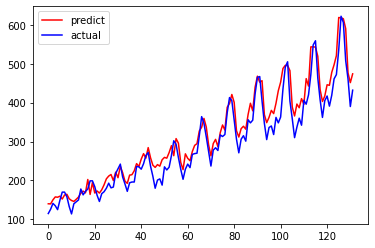

In [36]:
plt.plot(re, 'r', label='predict')
plt.plot(train_target2, 'b', label='actual')
plt.legend()
plt.show()

In [37]:
from tensorflow.keras.datasets import imdb

In [38]:
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

17473536/17464789 [==============================] - 0s 0us/step


In [39]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [41]:
train_seq = pad_sequences(train_input, maxlen=100)
test_seq = pad_sequences(test_input, maxlen=100)
print(train_seq.shape)

(25000, 100)


In [42]:
train_seq[0] #각각의 수치들은 어떤 단어들을 의미

array([  2,  33,   6,  22,  12, 215,  28,  77,  52,   5,  14, 407,  16,
        82,   2,   8,   4, 107, 117,   2,  15, 256,   4,   2,   7,   2,
         5,   2,  36,  71,  43,   2, 476,  26, 400, 317,  46,   7,   4,
         2,   2,  13, 104,  88,   4, 381,  15, 297,  98,  32,   2,  56,
        26, 141,   6, 194,   2,  18,   4, 226,  22,  21, 134, 476,  26,
       480,   5, 144,  30,   2,  18,  51,  36,  28, 224,  92,  25, 104,
         4, 226,  65,  16,  38,   2,  88,  12,  16, 283,   5,  16,   2,
       113, 103,  32,  15,  16,   2,  19, 178,  32], dtype=int32)

In [43]:
from tensorflow import keras

In [44]:
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer = adam, loss = keras.losses.binary_crossentropy)#, metrics = [])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm_4 (LSTM)               (None, 8)                 800       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [45]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=1000, validation_split=0.2, callbacks=[early_stopping_cb])

Epoch 1/1000
625/625 [==============================] - 18s 24ms/step - loss: 0.6915 - val_loss: 0.6878
Epoch 2/1000
625/625 [==============================] - 15s 24ms/step - loss: 0.6217 - val_loss: 0.5802
Epoch 3/1000
625/625 [==============================] - 16s 25ms/step - loss: 0.5594 - val_loss: 0.5522
Epoch 4/1000
625/625 [==============================] - 21s 34ms/step - loss: 0.5300 - val_loss: 0.5314
Epoch 5/1000
625/625 [==============================] - 15s 23ms/step - loss: 0.5053 - val_loss: 0.5089
Epoch 6/1000
625/625 [==============================] - 15s 24ms/step - loss: 0.4832 - val_loss: 0.4913
Epoch 7/1000
625/625 [==============================] - 15s 23ms/step - loss: 0.4652 - val_loss: 0.4785
Epoch 8/1000
625/625 [==============================] - 15s 23ms/step - loss: 0.4517 - val_loss: 0.4719
Epoch 9/1000
625/625 [==============================] - 15s 23ms/step - loss: 0.4445 - val_loss: 0.4588
Epoch 10/1000
625/625 [==============================] - 14s 23m